In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
data_path = Path(r"C:\Users\jhiy2\OneDrive\Documentos\trabalho-bd2\dados")

In [ ]:
df = pd.read_parquet(data_path / "df_final.parquet")

In [ ]:
df.head()

,Município,2016_geral,2017_geral,2018_geral,2019_geral,2020_geral,2021_geral,2022_geral,2021_covid,2022_covid,...,2020_socorro,2021_socorro,2022_socorro,2016_residentes,2017_residentes,2018_residentes,2019_residentes,2020_residentes,2021_residentes,2022_residentes
0,ARMAZEM,2539,3564,4609,8224,5295,4376,7497,14703.0,4663.0,...,-,-,-,8431,8520,8587,8674,8759,8894,8984
1,BALNEARIO CAMBORIU,34636,34293,58580,99544,80511,68340,64733,179664.0,58023.0,...,-,-,-,131727,135268,138732,142295,145796,140557,143159
2,BIGUACU,30165,25010,23772,64055,34121,37553,35446,97862.0,39842.0,...,1,1,1,65528,66558,67458,68481,69486,76850,78524
3,BLUMENAU,175406,201927,236681,309696,228466,177062,172782,540094.0,171145.0,...,1,1,1,343715,348513,352460,357199,361855,367492,371708
4,BRACO DO NORTE,10681,15033,18447,34385,22606,21452,22379,52095.0,18374.0,...,-,-,-,32209,32648,33016,33450,33876,34281,34703


In [ ]:
df.columns

Index(['Município', '2016_geral', '2017_geral', '2018_geral', '2019_geral',
       '2020_geral', '2021_geral', '2022_geral', '2021_covid', '2022_covid',
       '2023_covid', '2024_covid', '2016_leitos', '2017_leitos', '2018_leitos',
       '2019_leitos', '2020_leitos', '2021_leitos', '2022_leitos',
       '2016_centros', '2017_centros', '2018_centros', '2019_centros',
       '2020_centros', '2021_centros', '2022_centros', '2016_hospital',
       '2017_hospital', '2018_hospital', '2019_hospital', '2020_hospital',
       '2021_hospital', '2022_hospital', '2016_posto', '2017_posto',
       '2018_posto', '2019_posto', '2020_posto', '2021_posto', '2022_posto',
       '2016_socorro', '2017_socorro', '2018_socorro', '2019_socorro',
       '2020_socorro', '2021_socorro', '2022_socorro', '2016_residentes',
       '2017_residentes', '2018_residentes', '2019_residentes',
       '2020_residentes', '2021_residentes', '2022_residentes'],
      dtype='object')

In [ ]:
df.head()

,Município,2016_geral,2017_geral,2018_geral,2019_geral,2020_geral,2021_geral,2022_geral,2021_covid,2022_covid,...,2020_socorro,2021_socorro,2022_socorro,2016_residentes,2017_residentes,2018_residentes,2019_residentes,2020_residentes,2021_residentes,2022_residentes
0,ARMAZEM,2539,3564,4609,8224,5295,4376,7497,14703.0,4663.0,...,-,-,-,8431,8520,8587,8674,8759,8894,8984
1,BALNEARIO CAMBORIU,34636,34293,58580,99544,80511,68340,64733,179664.0,58023.0,...,-,-,-,131727,135268,138732,142295,145796,140557,143159
2,BIGUACU,30165,25010,23772,64055,34121,37553,35446,97862.0,39842.0,...,1,1,1,65528,66558,67458,68481,69486,76850,78524
3,BLUMENAU,175406,201927,236681,309696,228466,177062,172782,540094.0,171145.0,...,1,1,1,343715,348513,352460,357199,361855,367492,371708
4,BRACO DO NORTE,10681,15033,18447,34385,22606,21452,22379,52095.0,18374.0,...,-,-,-,32209,32648,33016,33450,33876,34281,34703


In [ ]:
value_cols = [col for col in df.columns if col != "Município"]

df_long = df.melt(
    id_vars="Município",
    value_vars=value_cols,
    var_name="ano_variavel",
    value_name="valor"
)

In [ ]:
df_long[['ano', 'tipo']] = df_long['ano_variavel'].str.split('_', expand=True)
df_long['ano'] = df_long['ano'].astype(int)

In [ ]:
df_long.head()

,Município,ano_variavel,valor,ano,tipo
0,ARMAZEM,2016_geral,2539,2016,geral
1,BALNEARIO CAMBORIU,2016_geral,34636,2016,geral
2,BIGUACU,2016_geral,30165,2016,geral
3,BLUMENAU,2016_geral,175406,2016,geral
4,BRACO DO NORTE,2016_geral,10681,2016,geral


### Série temporal de vacinação geral de todos os municípios

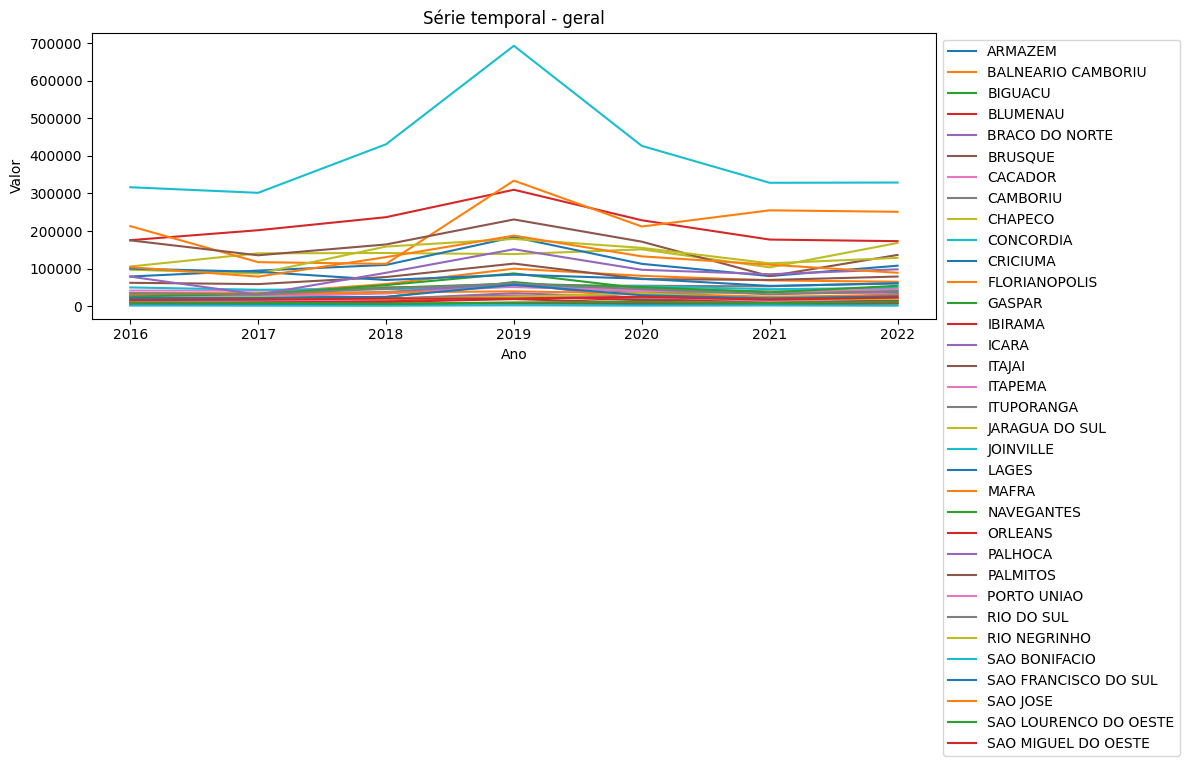

In [ ]:
tipo_escolhido = "geral"

df_plot = df_long[df_long["tipo"] == tipo_escolhido]

plt.figure(figsize=(12,6))

for municipio, dados in df_plot.groupby("Município"):
    plt.plot(dados["ano"], dados["valor"], label=municipio)

plt.xticks(sorted(df_plot["ano"].unique()))
plt.title(f"Série temporal - {tipo_escolhido}")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

### Série temporal de vacinação covid de todos os municípios

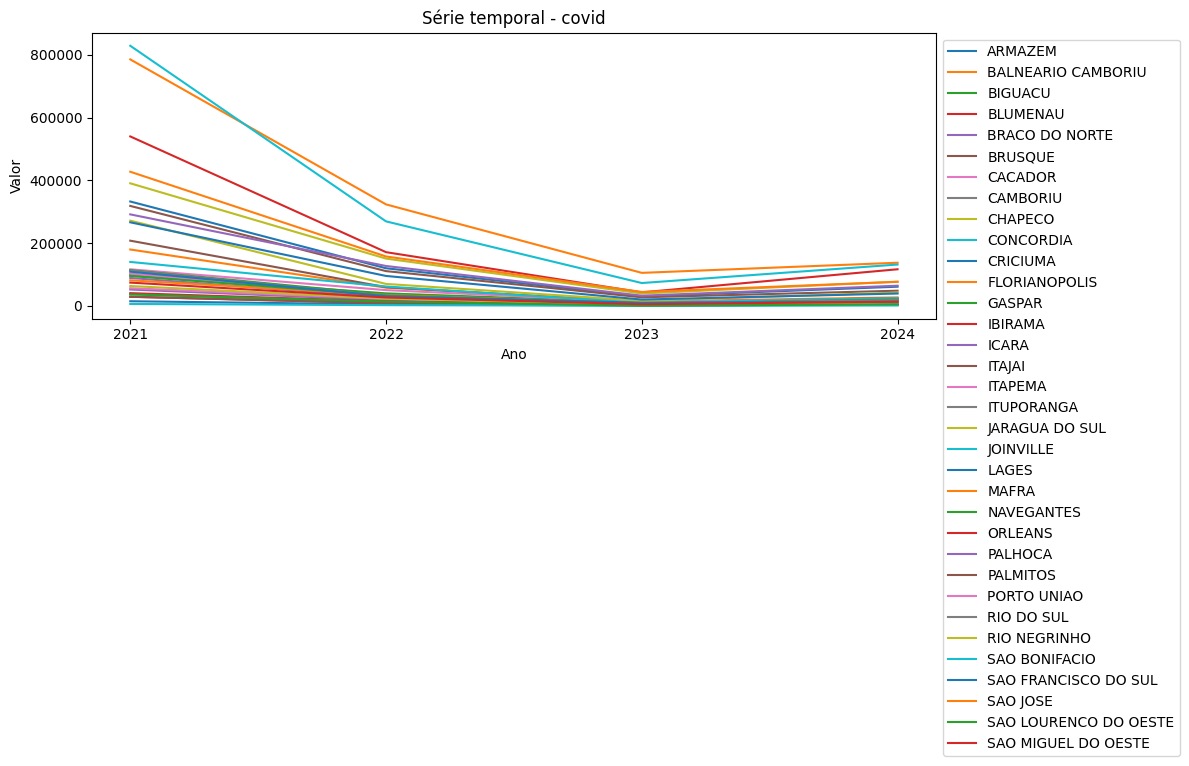

In [ ]:
tipo_escolhido = "covid"

df_plot = df_long[df_long["tipo"] == tipo_escolhido]

plt.figure(figsize=(12,6))

for municipio, dados in df_plot.groupby("Município"):
    plt.plot(dados["ano"], dados["valor"], label=municipio)

plt.xticks(sorted(df_plot["ano"].unique()))
plt.title(f"Série temporal - {tipo_escolhido}")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

### Série temporal de quantidade de residentes

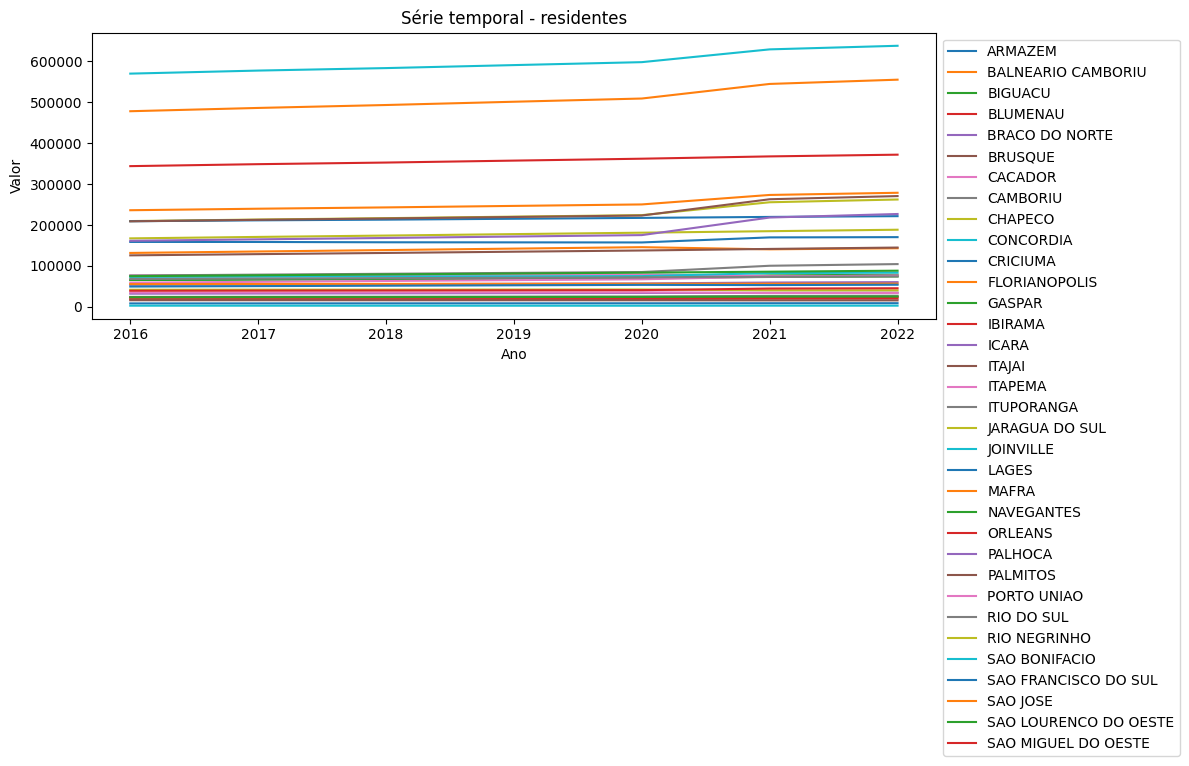

In [ ]:
tipo_escolhido = "residentes"

df_plot = df_long[df_long["tipo"] == tipo_escolhido]

plt.figure(figsize=(12,6))

for municipio, dados in df_plot.groupby("Município"):
    plt.plot(dados["ano"], dados["valor"], label=municipio)

plt.xticks(sorted(df_plot["ano"].unique()))
plt.title(f"Série temporal - {tipo_escolhido}")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

### Série temporal de leitos por município

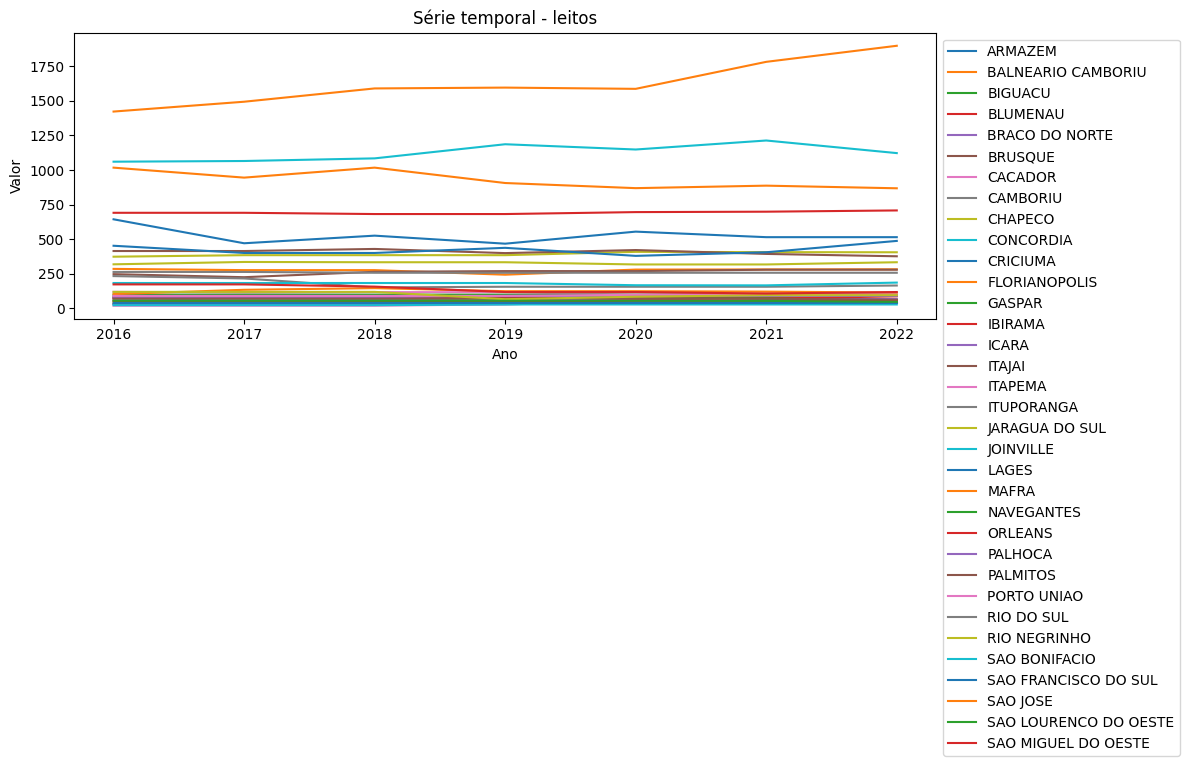

In [ ]:
tipo_escolhido = "leitos"

df_plot = df_long[df_long["tipo"] == tipo_escolhido]

plt.figure(figsize=(12,6))

for municipio, dados in df_plot.groupby("Município"):
    plt.plot(dados["ano"], dados["valor"], label=municipio)

plt.xticks(sorted(df_plot["ano"].unique()))
plt.title(f"Série temporal - {tipo_escolhido}")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

### Série temporal com todos os estabelecimentos de uma cidade

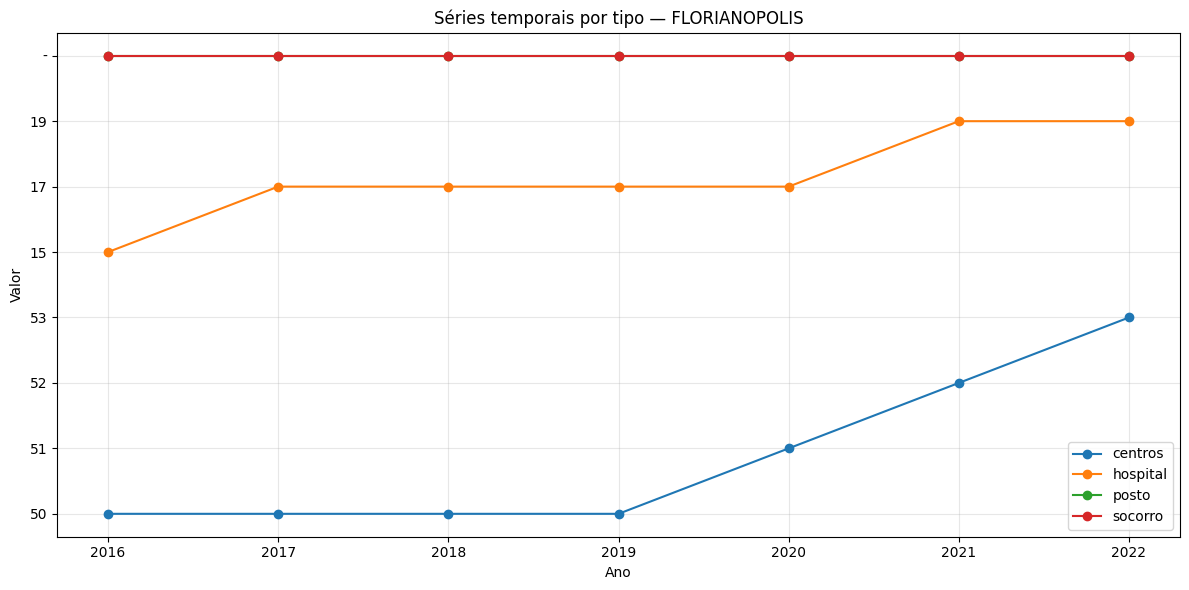

In [ ]:
cidade = "FLORIANOPOLIS"
tipos = ["hospital", "posto", "socorro", "centros"]

df_city = df_long[
    (df_long["Município"] == cidade) &
    (df_long["tipo"].isin(tipos))
]

plt.figure(figsize=(12,6))

for tipo, dados in df_city.groupby("tipo"):
    plt.plot(dados["ano"], dados["valor"], marker="o", label=tipo)

plt.title(f"Séries temporais por tipo — {cidade}")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Série temporal de leitos de um município

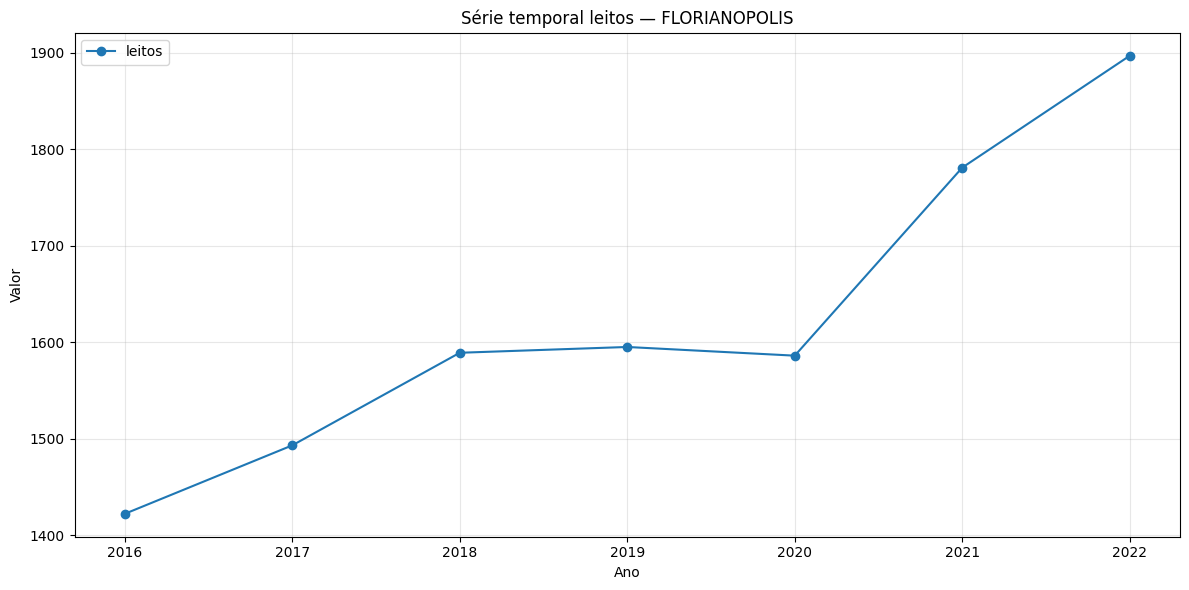

In [ ]:
cidade = "FLORIANOPOLIS"
tipos = ["leitos"]

df_city = df_long[
    (df_long["Município"] == cidade) &
    (df_long["tipo"].isin(tipos))
]

plt.figure(figsize=(12,6))

for tipo, dados in df_city.groupby("tipo"):
    plt.plot(dados["ano"], dados["valor"], marker="o", label=tipo)

plt.title(f"Série temporal leitos — {cidade}")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Série temporal com as quantidades de vacinas de covid e geral de um município

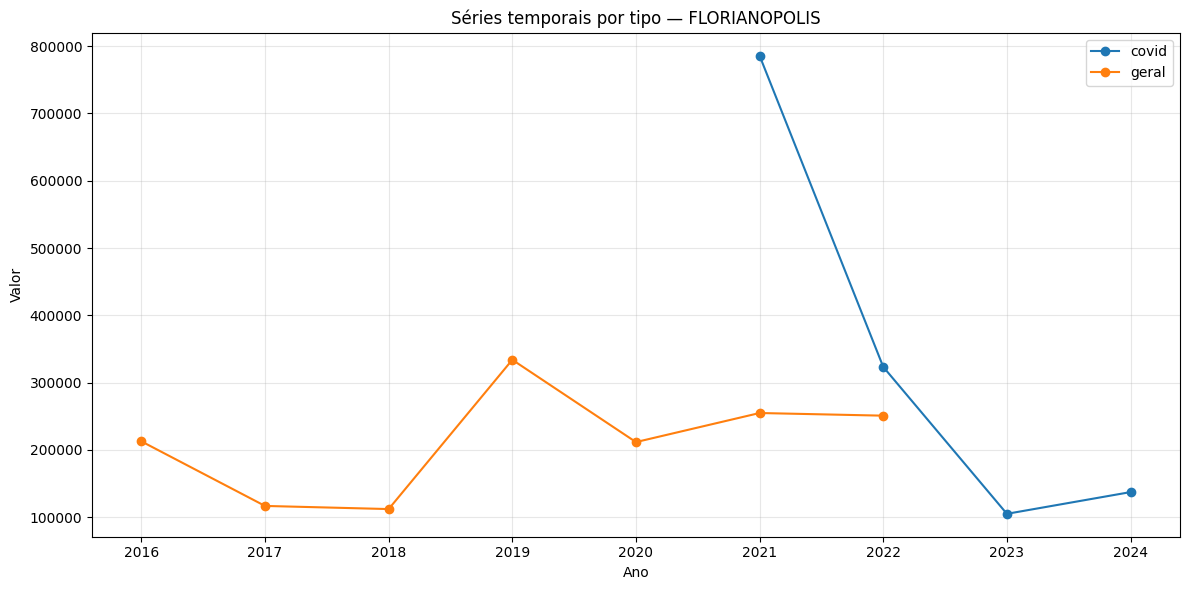

In [ ]:
cidade = "FLORIANOPOLIS"
tipos = ["geral", "covid"]

df_city = df_long[
    (df_long["Município"] == cidade) &
    (df_long["tipo"].isin(tipos))
]

plt.figure(figsize=(12,6))

for tipo, dados in df_city.groupby("tipo"):
    plt.plot(dados["ano"], dados["valor"], marker="o", label=tipo)

plt.title(f"Séries temporais por tipo — {cidade}")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Série temporal com as quantidades de vacinas geral e residentes de um município

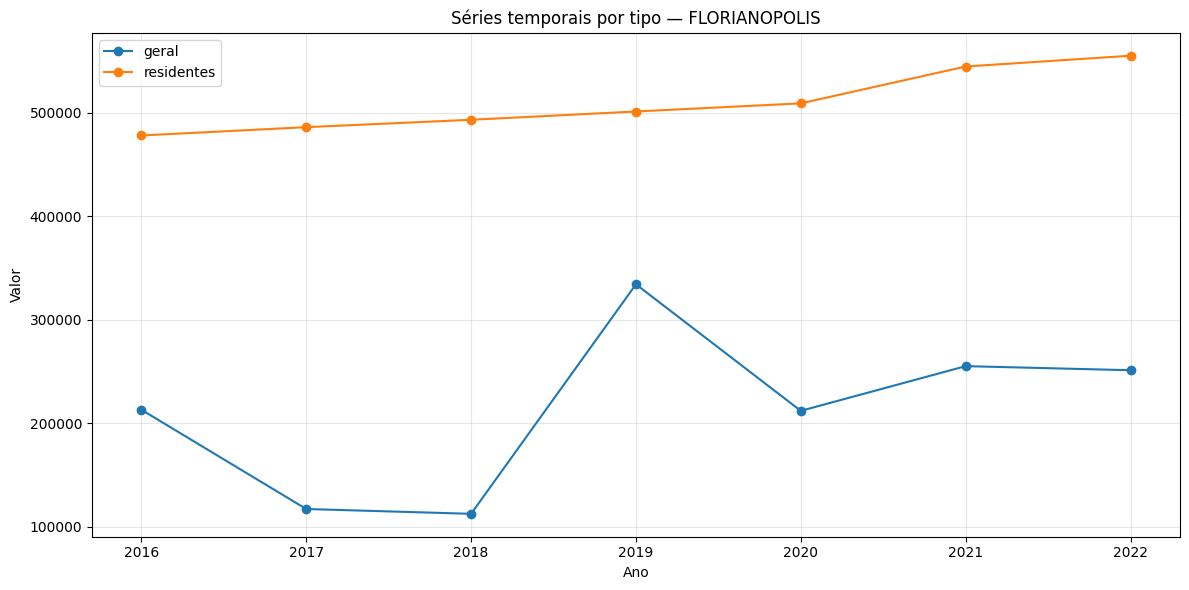

In [ ]:
cidade = "FLORIANOPOLIS"
tipos = ["residentes", "geral"]

df_city = df_long[
    (df_long["Município"] == cidade) &
    (df_long["tipo"].isin(tipos))
]

plt.figure(figsize=(12,6))

for tipo, dados in df_city.groupby("tipo"):
    plt.plot(dados["ano"], dados["valor"], marker="o", label=tipo)

plt.title(f"Séries temporais por tipo — {cidade}")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Série temporal com as quantidades de vacinas covid e residentes de um município

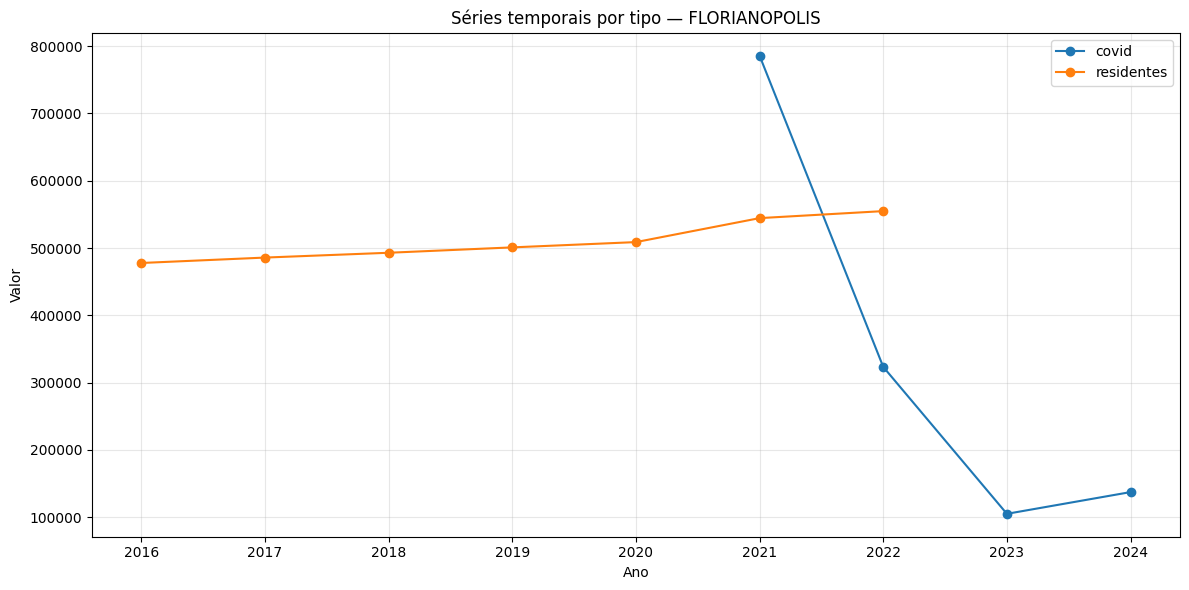

In [ ]:

cidade = "FLORIANOPOLIS"
tipos = ["residentes", "covid"]

df_city = df_long[
    (df_long["Município"] == cidade) &
    (df_long["tipo"].isin(tipos))
]

plt.figure(figsize=(12,6))

for tipo, dados in df_city.groupby("tipo"):
    plt.plot(dados["ano"], dados["valor"], marker="o", label=tipo)

plt.title(f"Séries temporais por tipo — {cidade}")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()